### Student Name: Chelliah Kanthanathan
### Student ID: 18263003

### TASK 3: Create your own implementation of linear classification to perform a classification of the dataset provided. Use normal linear regression with sign(wTx) to obtain a classification.

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [116]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 
orig_X = X
orig_y = y

In [117]:
print (X.shape)

(1000, 2)


In [118]:
print (len(y))

1000


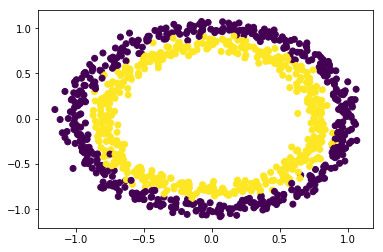

In [127]:
plt.scatter(X[:,0], X[:,1], c=y)

In [128]:
# Plot the boundary ### 
# Thanks to Michel Danjou for explaining plots..
def decision_boundary_line(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_line(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

# In House Linear Classification

In [129]:
def inHouseLinearClassification(X,y):
    # Insert bias
    X = np.insert(X, 0, 1, axis=1)

    # shuffle data
    X, y = shuffle(X, y, random_state=0)

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Calculate the pseudoinverse of X
    X_inverse = np.linalg.pinv(X_train)
    print (X_inverse)
    print (X_inverse.shape)
    
    # Find the coefficients 
    coefficients = X_inverse.dot(y_train)
    print (coefficients)
    print (coefficients.shape)
    
    # Plot the results
    X_min = np.min(X)
    X_max = np.max(X)
    y_min, y_max = decision_boundary_line(coefficients, X_min, X_max)
    plt.scatter(X[:,1], X[:,2], c=y)
    plt.plot([X_min, X_max], [y_min, y_max], 'ro-', label='decision boundary')

[[ 0.00125946  0.00123926  0.00128617 ...  0.00127807  0.00123753
   0.0012178 ]
 [-0.00088865  0.00114429  0.00247669 ...  0.0002284  -0.00225838
  -0.00233578]
 [ 0.0021429  -0.00257933  0.00185464 ...  0.0032668   0.00087596
  -0.00150977]]
(3, 800)
[ 0.00505208  0.013642   -0.00820371]
(3,)


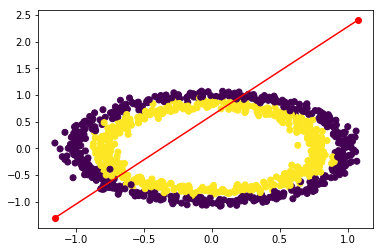

In [130]:
inHouseLinearClassification(orig_X,orig_y)

### The above plot shows that the datapoints are not linearly separable, Thus the best fit was half of it i.e. in the middle of circle for make circle data sets. The In House Linear Classification alogorithm could not find the best fit classification line.

### Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!

#### SQUARE the DATA POINTS

[[ 0.00787729  0.00047411 -0.00469793 ... -0.00687143  0.00570388
  -0.00056873]
 [-0.00933696 -0.001115    0.00819101 ...  0.0058804  -0.00365879
   0.00342606]
 [-0.00657164  0.00301538  0.00609006 ...  0.01371025 -0.00707748
   0.00092493]]
(3, 800)
[ 3.66947087 -4.42315639 -4.38597645]
(3,)


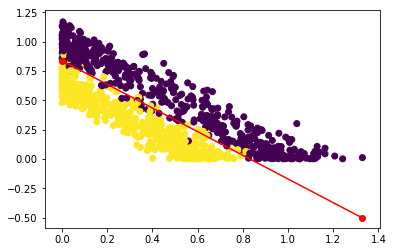

In [131]:
X_square = np.square(orig_X)
inHouseLinearClassification(X_square,orig_y)

### Using square transformation improved the classification performance

# Logistic Regression

In [150]:
def logistic_Regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model_logistic = LogisticRegression(solver='lbfgs')
    model_logistic.fit(X_train,y_train)
    Y_pred = model_logistic.predict(X_test)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8, edgecolors='b')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8, edgecolors='r')
    plt.legend(loc="best")
    plt.show()

No handles with labels found to put in legend.


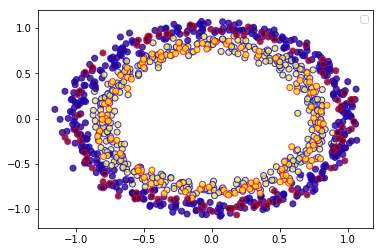

In [151]:
# Using Original Data
logistic_Regression(orig_X,orig_y)

No handles with labels found to put in legend.


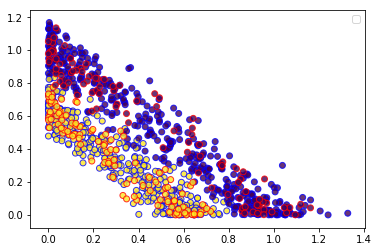

In [152]:
# using squared X
logistic_Regression(np.square(orig_X),orig_y)

### In overall the square transformation improves the classification performance for both the in house classfication and the logistic regression